In [1]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import statsmodels.api as sm

In [27]:
df_all = pd.read_csv("/Users/dohee/Documents/ds_study/ML_project1/datas/features_3_sec.csv")

In [28]:
df_all.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
X = df_all.drop(labels=['length','filename','label','tempo'],axis=1)
X

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,8.479527e+05,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,1.170890e+06,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,2.602871e+06,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,4.968878e+05,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import sklearn

In [6]:
scaler = sklearn.preprocessing.StandardScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns=X.columns)

In [7]:
Y = df_all['label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7992, 56) (7992,)
(1998, 56) (1998,)


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [11]:
model = LogisticRegression(multi_class='multinomial',solver='lbfgs')
model.fit(sm.add_constant(X_train), y_train)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [12]:
# train

print(model.score(sm.add_constant(X_train), y_train))

0.7413663663663663


In [13]:
#test

print(model.score(sm.add_constant(X_test), y_test))

0.7317317317317318


In [14]:
model.intercept_

array([ 0.13909262, -3.45083974,  1.34211894,  1.38864061,  1.11062977,
       -0.43069984, -1.98470501, -0.8508618 ,  1.52975662,  1.20686783])

In [15]:
model.coef_

array([[ 1.16102437e-01, -5.01715273e-01,  4.97723758e-01,
         1.98403728e+00,  1.17022868e+00, -2.30897922e+00,
        -5.63555654e-01, -1.97939034e+00, -4.27858411e-01,
        -3.19717006e-01, -5.33094756e-01,  1.93133726e+00,
        -2.88276884e-01,  3.70235081e-01, -8.90787454e-01,
        -2.73581167e-01,  6.72574923e-01, -1.18941686e+00,
        -9.79706304e-02, -1.03506887e+00,  9.43108125e-02,
         1.74637506e+00,  2.78356251e-01,  6.54043961e-01,
         7.90056194e-02, -1.24501107e-01,  4.99477584e-01,
         1.08384147e+00, -4.80878529e-02, -8.31959862e-01,
         6.54307458e-02,  3.90846017e-01,  1.29939673e-01,
        -5.93499373e-01, -1.22495137e-01,  1.40865652e-02,
        -6.85045499e-02,  8.59044246e-02,  3.54021189e-02,
        -5.70169740e-01,  5.72724725e-02, -4.25431822e-01,
        -5.51277084e-02,  1.43727687e-01, -6.26664373e-02,
        -2.86010147e-01, -4.11749753e-02,  1.26020478e-01,
         1.62249924e-01, -3.77398302e-01, -1.57231584e-0

In [54]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
from matplotlib import pyplot
import statsmodels.api as sm

logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit()
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: 0.765138
         Iterations 12
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 7992
Model:                        MNLogit   Df Residuals:                     7479
Method:                           MLE   Df Model:                          504
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.6677
Time:                        18:27:22   Log-Likelihood:                -6115.0
converged:                       True   LL-Null:                       -18401.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    y=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -11.0014      1.260     -8.732      0.000     -13.471  

In [17]:
y_pred = model.predict(sm.add_constant(X_test))

In [18]:
y_pred, y_test

(array([0, 7, 8, ..., 0, 1, 5]), array([0, 7, 2, ..., 0, 1, 0]))

In [19]:
cmf = confusion_matrix(y_test, y_pred)
cmf

array([[158,   1,   8,   3,   4,  10,  13,   0,   5,   5],
       [  2, 189,   1,   0,   0,  11,   0,   0,   0,   0],
       [ 25,   1, 127,   8,   5,   9,   5,   8,   5,  28],
       [  3,   1,   3, 128,   6,   1,   6,  11,  12,  22],
       [  8,   0,   2,  14, 127,   0,   5,   8,  23,   3],
       [  4,   8,  11,   1,   0, 187,   0,   2,   1,   3],
       [  4,   0,   0,   5,   4,   1, 179,   0,   2,  21],
       [  0,   1,   9,   6,  14,   1,   0, 152,   7,   9],
       [  5,   0,   6,   7,  18,   1,   1,   9, 122,   9],
       [ 13,   2,  15,  19,   6,   5,   7,   5,   9,  93]])

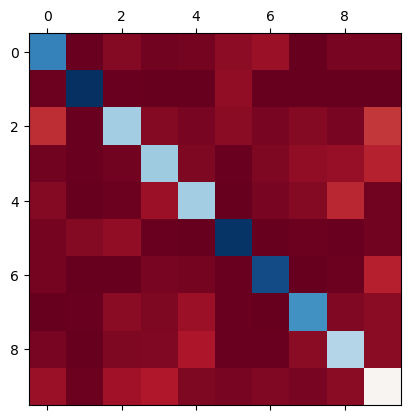

In [22]:
cmf = confusion_matrix(y_test, y_pred)
plt.matshow(cmf, cmap=plt.cm.RdBu)
plt.show()

---

In [10]:
import genre_transition as gt
path_entersandman = "/Users/dohee/Documents/ds_study/data/new_musics/Metallica Enter Sandman (Official Music Video).wav"
new_data1 = gt.feature_extraction(file_path=path_entersandman, file_name='entersandman', n=3)
new_data2 = gt.mfcc_extraction(file_path=path_entersandman, file_name='entersandman', mfcc_n=20,n=3)


/Users/dohee/Documents/ds_study/ML_project1/codes/genre_transition.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/Users/dohee/Documents/ds_study/ML_project1/codes/genre_transition.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  new_y, new_sr = librosa.load(file_path,offset=start,duration=n)
/Users/dohee/Documents/ds_study/ML_project1/codes/genre_transition.py:70: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/Users/dohee/Documents/ds_study/ML_project1/codes/genre_transition.py:75: UserWarning: PySoundFile failed. Trying audioread instead.
  new_y, new_sr = librosa.load(file_path

In [11]:
new_data1 = pd.DataFrame(new_data1)
new_data2 = pd.DataFrame(new_data2)

new_data = pd.merge(new_data1, new_data2)

In [12]:
new_data2

,path,split,filename,mfcc1,mfcc_var1,mfcc2,mfcc_var2,mfcc3,mfcc_var3,mfcc4,...,mfcc16,mfcc_var16,mfcc17,mfcc_var17,mfcc18,mfcc_var18,mfcc19,mfcc_var19,mfcc20,mfcc_var20
0,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_0,entersandman,-697.201355,27769.082031,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_0,entersandman,-697.201355,27769.082031,20.619221,1953.278564,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_0,entersandman,-697.201355,27769.082031,20.619221,1953.278564,-3.402571,234.440201,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_0,entersandman,-697.201355,27769.082031,20.619221,1953.278564,-3.402571,234.440201,11.295681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_0,entersandman,-697.201355,27769.082031,20.619221,1953.278564,-3.402571,234.440201,11.295681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_109,entersandman,-428.822845,6156.368164,102.854248,459.037842,-5.814130,155.212296,40.918774,...,2.683998,26.842375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2196,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_109,entersandman,-428.822845,6156.368164,102.854248,459.037842,-5.814130,155.212296,40.918774,...,2.683998,26.842375,-5.630323,36.298069,NaN,NaN,NaN,NaN,NaN,NaN
2197,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_109,entersandman,-428.822845,6156.368164,102.854248,459.037842,-5.814130,155.212296,40.918774,...,2.683998,26.842375,-5.630323,36.298069,5.573866,23.941462,NaN,NaN,NaN,NaN
2198,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_109,entersandman,-428.822845,6156.368164,102.854248,459.037842,-5.814130,155.212296,40.918774,...,2.683998,26.842375,-5.630323,36.298069,5.573866,23.941462,0.260131,31.261801,NaN,NaN


In [13]:
new_data

,path,split,filename,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,chroma_stft_var,...,mfcc16,mfcc_var16,mfcc17,mfcc_var17,mfcc18,mfcc_var18,mfcc19,mfcc_var19,mfcc20,mfcc_var20
0,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_0,entersandman,0.637568,0.004958,4958.370778,2885.517060,8287.053223,0.442792,0.056525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_0,entersandman,0.637568,0.004958,4958.370778,2885.517060,8287.053223,0.442792,0.056525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_0,entersandman,0.637568,0.004958,4958.370778,2885.517060,8287.053223,0.442792,0.056525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_0,entersandman,0.637568,0.004958,4958.370778,2885.517060,8287.053223,0.442792,0.056525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_0,entersandman,0.637568,0.004958,4958.370778,2885.517060,8287.053223,0.442792,0.056525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_109,entersandman,0.483798,0.005554,1986.555545,2381.166133,4255.954778,0.066196,0.079727,...,2.683998,26.842375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2196,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_109,entersandman,0.483798,0.005554,1986.555545,2381.166133,4255.954778,0.066196,0.079727,...,2.683998,26.842375,-5.630323,36.298069,NaN,NaN,NaN,NaN,NaN,NaN
2197,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_109,entersandman,0.483798,0.005554,1986.555545,2381.166133,4255.954778,0.066196,0.079727,...,2.683998,26.842375,-5.630323,36.298069,5.573866,23.941462,NaN,NaN,NaN,NaN
2198,/Users/dohee/Documents/ds_study/data/new_music...,entersandman_109,entersandman,0.483798,0.005554,1986.555545,2381.166133,4255.954778,0.066196,0.079727,...,2.683998,26.842375,-5.630323,36.298069,5.573866,23.941462,0.260131,31.261801,NaN,NaN


In [ ]:
new_X = new_data.drop(labels=['path','filename','label','tempo'],axis=1)
new_X

jazz